<a href="https://colab.research.google.com/github/Tywashburn22/Machine-Learning/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [247]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

In [248]:
print(f"Sample size: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target: {y.shape[0]}")

Sample size: 569
Number of features: 30
Target: 569


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(f"X train set size: {X_train.shape}")
print(f"X test set size: {X_test.shape}")
print(f"y train set size: {y_train.shape}")
print(f"y test set size: {y_test.shape}")

X train set size: (426, 30)
X test set size: (143, 30)
y train set size: (426,)
y test set size: (143,)


In [250]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [251]:
yp = gnb.predict(X_test)

In [252]:
print("Method score:", gnb.score(X_test, y_test))

Method score: 0.9370629370629371


In [253]:
cm = confusion_matrix(y_test, yp)

In [254]:
print(f'Confusion matrix:\n{cm}')

Confusion matrix:
[[48  5]
 [ 4 86]]


In [255]:
print('Classification Report:\n', classification_report(y_test, yp))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



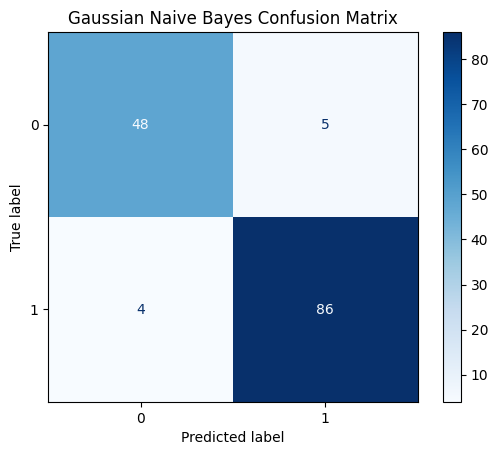

In [256]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
vis.plot(cmap=plt.cm.Blues)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

In [257]:
estimators = {
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Support Vector Machine': SVC(gamma='scale')
}

In [258]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
best_model_name = None
best_model_score = -1

In [259]:
for name, model in estimators.items():
    print(f"\nEvaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=kfold)
    mean_score = np.mean(scores)
    print(f"Mean cross-validation score for {name}: {round(mean_score, 2)}")

    if mean_score > best_model_score:
        best_model_name = name
        best_model_score = mean_score


Evaluating Gaussian Naive Bayes...
Mean cross-validation score for Gaussian Naive Bayes: 0.94

Evaluating K-Nearest Neighbors...
Mean cross-validation score for K-Nearest Neighbors: 0.93

Evaluating Logistic Regression...
Mean cross-validation score for Logistic Regression: 0.95

Evaluating Support Vector Machine...
Mean cross-validation score for Support Vector Machine: 0.92


In [260]:
print(f'The best model is {best_model_name} with a cross-validation score of {round(best_model_score, 2)}')

The best model is Logistic Regression with a cross-validation score of 0.95
